In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as talib
from scipy.signal import argrelextrema

In [14]:
stock_list=['INFY.NS','SBIN.NS','AXISBANK.NS','TCS.NS','ASIANPAINT.NS','NFLX','AAPL','GOOGL','TSLA']

[*********************100%***********************]  1 of 1 completed


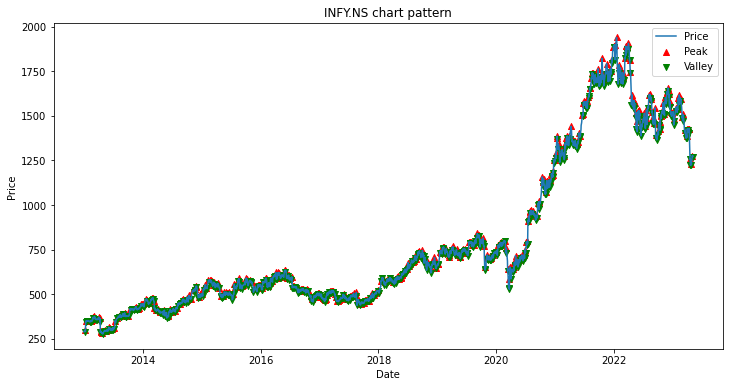

[*********************100%***********************]  1 of 1 completed


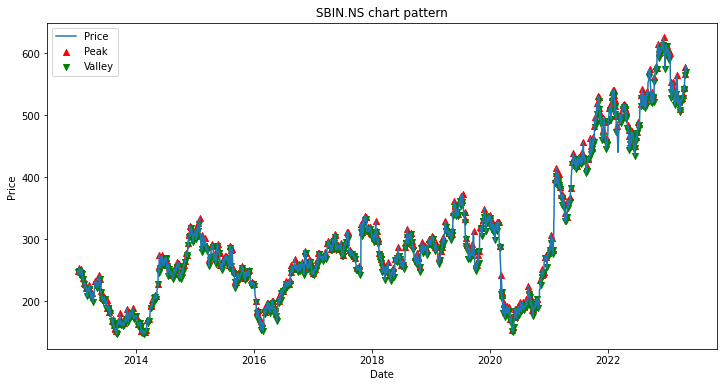

[*********************100%***********************]  1 of 1 completed


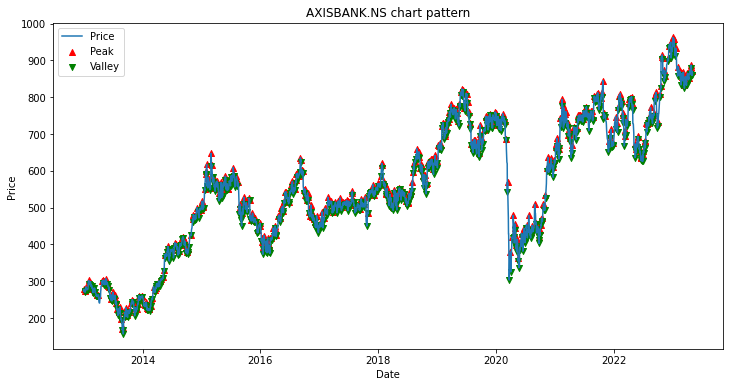

[*********************100%***********************]  1 of 1 completed


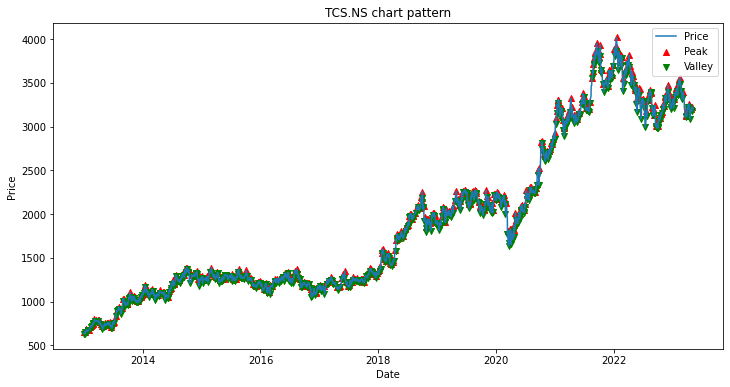

[*********************100%***********************]  1 of 1 completed


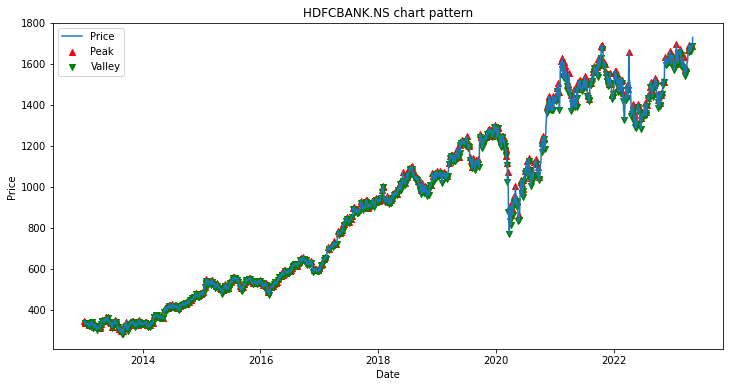

[*********************100%***********************]  1 of 1 completed


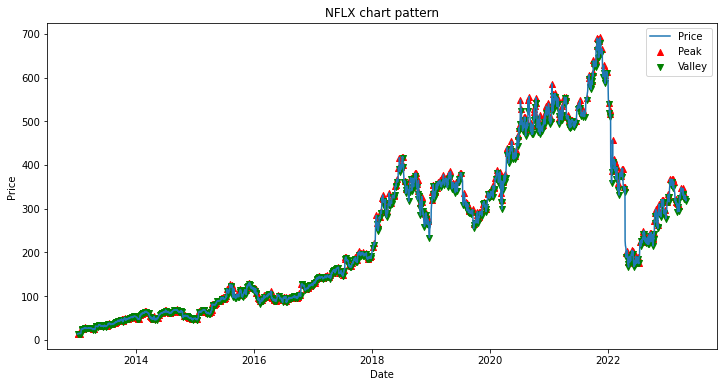

[*********************100%***********************]  1 of 1 completed


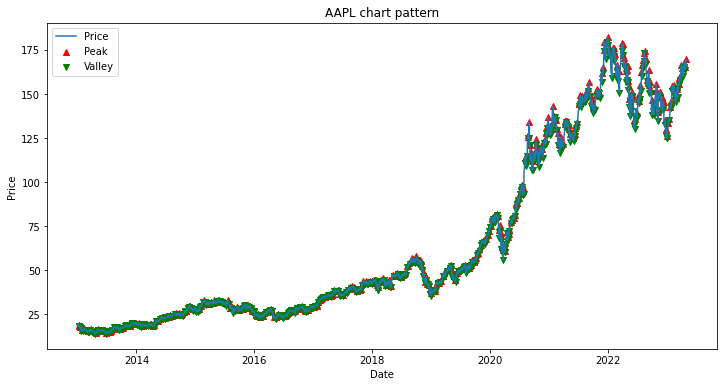

[*********************100%***********************]  1 of 1 completed


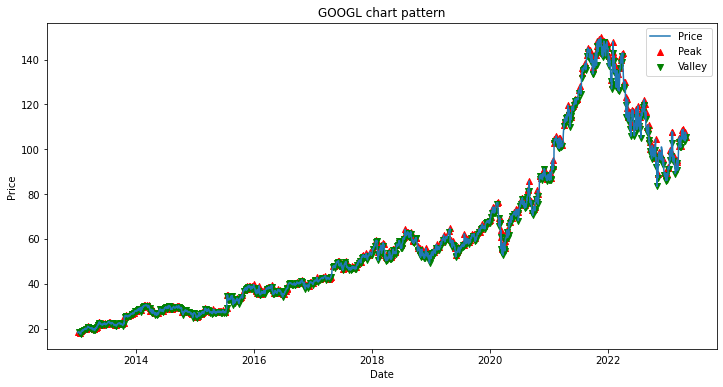

[*********************100%***********************]  1 of 1 completed


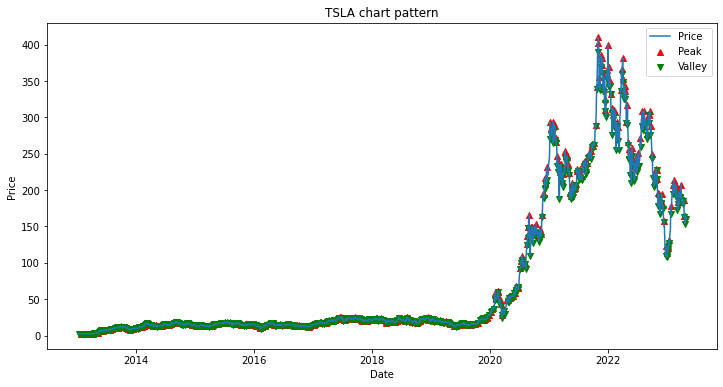

In [6]:
for ticker in stock_list:
    # Get the stock's historical df
    df = yf.download(ticker,'2013-01-01','2023-05-05')
    rsi = talib.RSI(df['Close'])

    peaks = df['Close'][(df['Close'].shift(1) < df['Close']) & (df['Close'].shift(-1) < df['Close'])]
    valleys = df['Close'][(df['Close'].shift(1) > df['Close']) & (df['Close'].shift(-1) > df['Close'])]

# Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Price')
    plt.scatter(peaks.index, peaks, c='r', marker='^', label='Peak')
    plt.scatter(valleys.index, valleys, c='g', marker='v', label='Valley')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(ticker + " chart pattern")
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


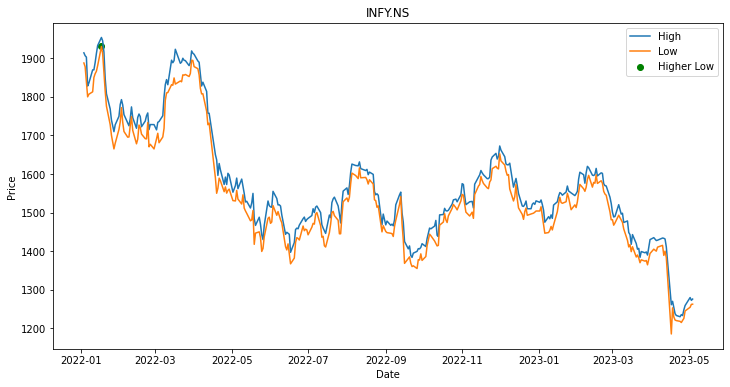

[*********************100%***********************]  1 of 1 completed


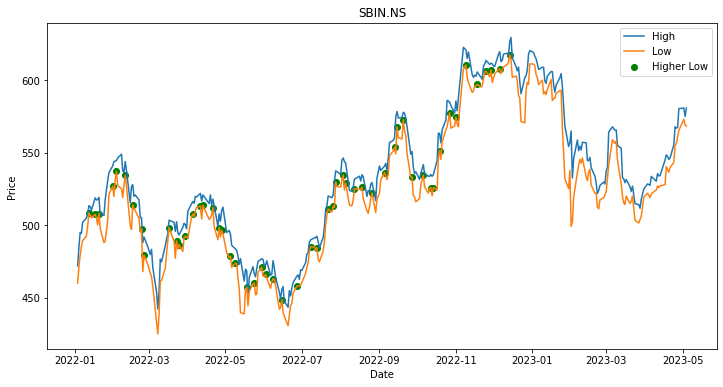

[*********************100%***********************]  1 of 1 completed


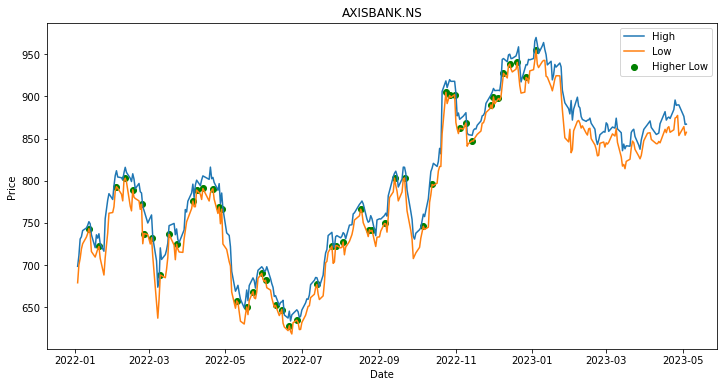

[*********************100%***********************]  1 of 1 completed


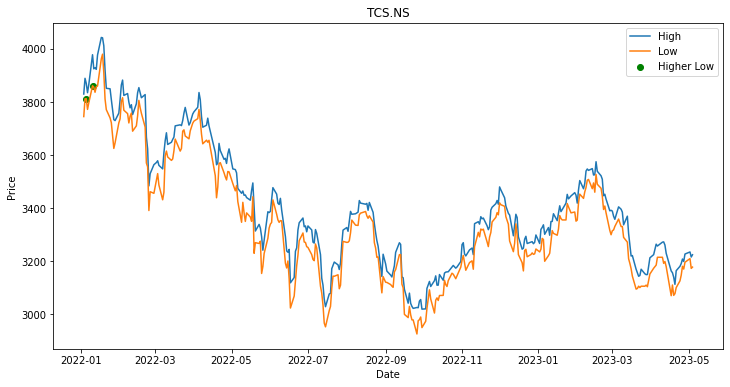

[*********************100%***********************]  1 of 1 completed


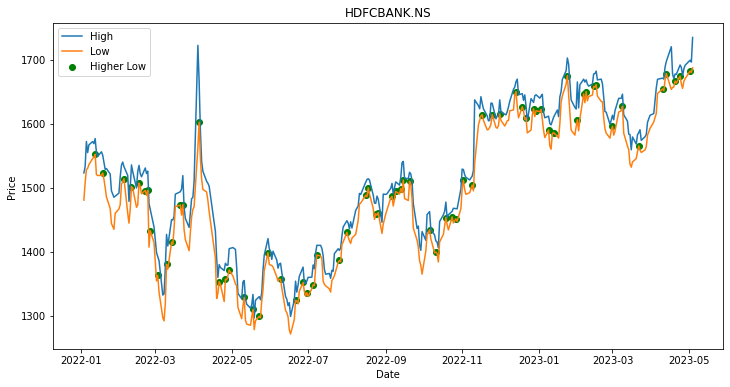

[*********************100%***********************]  1 of 1 completed


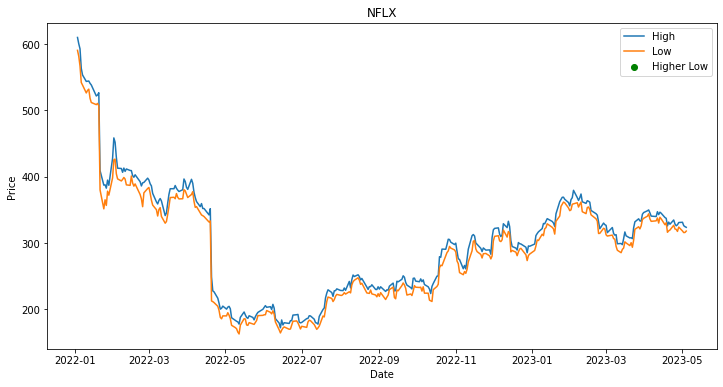

[*********************100%***********************]  1 of 1 completed


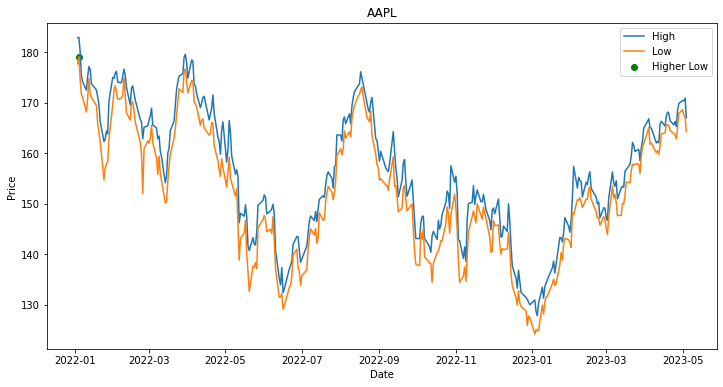

[*********************100%***********************]  1 of 1 completed


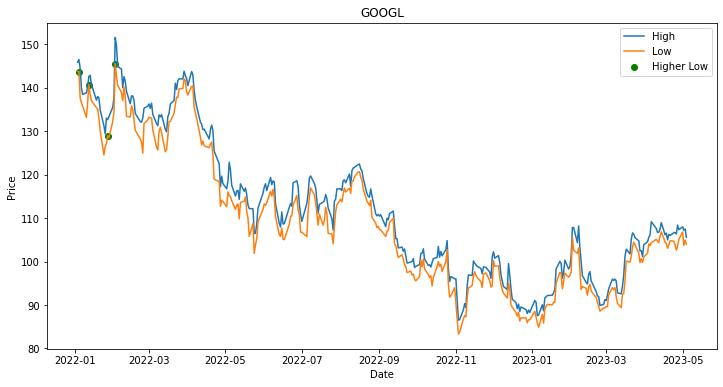

[*********************100%***********************]  1 of 1 completed


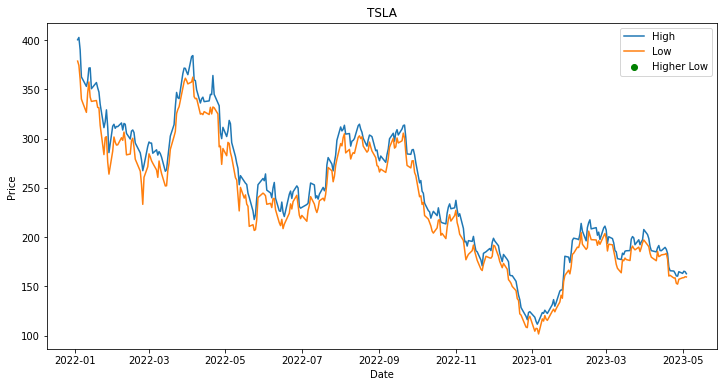

In [7]:
for ticker in stock_list:
    df = yf.download(ticker,'2022-01-01','2023-05-05')
    atr = talib.ATR(df['High'], df['Low'], df['Close'])

# Find the index of the highest point
    high_point_index = df['High'].idxmax()

# Find the lowest points before the high point
    low_points = df['Low'][:high_point_index][(df['Low'].shift(1) < df['Low']) & (df['Low'].shift(-1) < df['Low'])]

# Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df['High'], label='High')
    plt.plot(df['Low'], label='Low')
    # plt.axhline(df['High'].iloc[high_point_index], color='r', linestyle='--', label='Resistance')
    plt.scatter(low_points.index, low_points, c='g', marker='o', label='Higher Low')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(ticker)
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


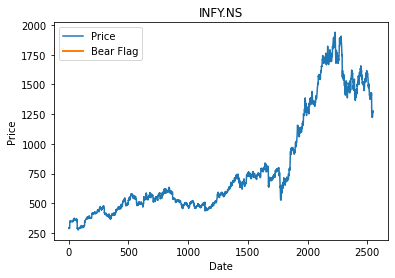

[*********************100%***********************]  1 of 1 completed


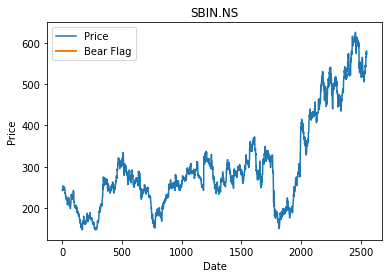

[*********************100%***********************]  1 of 1 completed


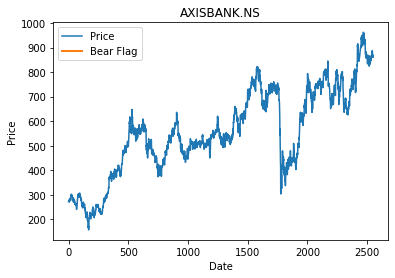

[*********************100%***********************]  1 of 1 completed


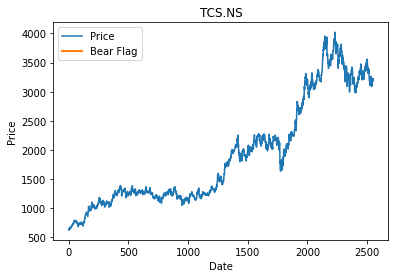

[*********************100%***********************]  1 of 1 completed


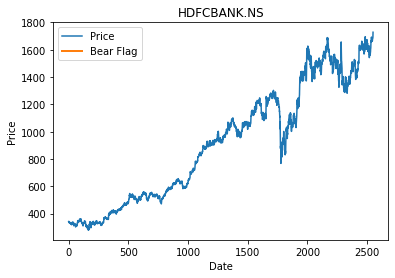

[*********************100%***********************]  1 of 1 completed


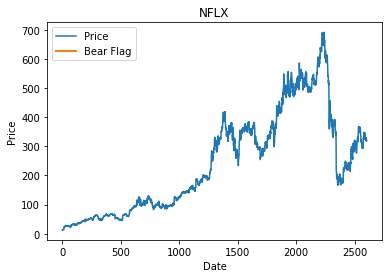

[*********************100%***********************]  1 of 1 completed


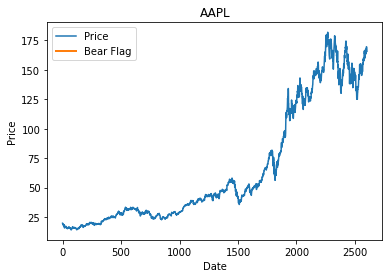

[*********************100%***********************]  1 of 1 completed


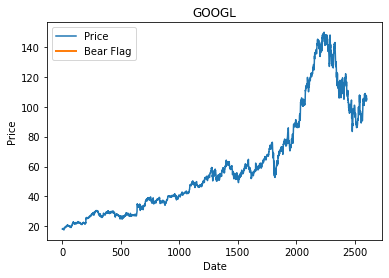

[*********************100%***********************]  1 of 1 completed


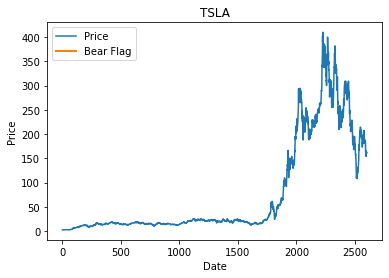

In [9]:
for ticker in stock_list:
    df = yf.download(ticker,'2013-01-01','2023-05-05')
    flag_start = df['Close'].idxmax()
    flag_end = df['Close'].idxmin()
    flag_data = df.loc[flag_start:flag_end]

# Plotting
    num_index = range(len(flag_data))

# Plotting
    plt.plot(range(len(df)), df['Close'], label='Price')
    plt.plot(num_index, flag_data['Close'], label='Bear Flag', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(ticker)
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


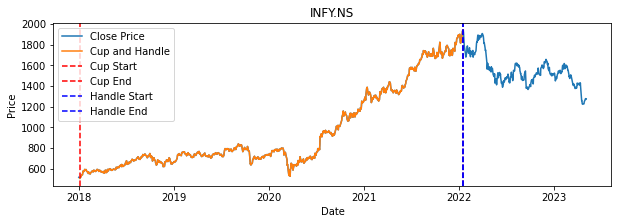

[*********************100%***********************]  1 of 1 completed


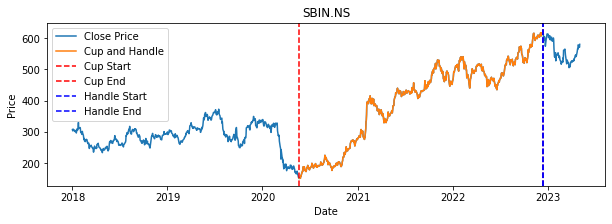

[*********************100%***********************]  1 of 1 completed


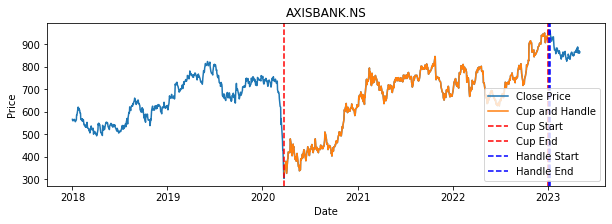

[*********************100%***********************]  1 of 1 completed


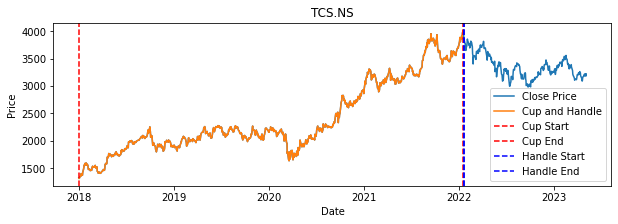

[*********************100%***********************]  1 of 1 completed


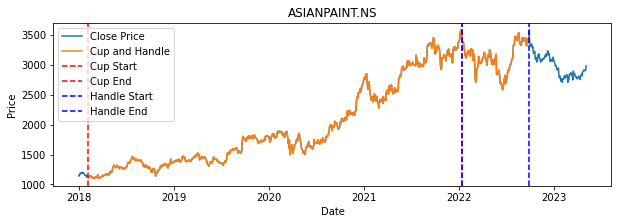

[*********************100%***********************]  1 of 1 completed


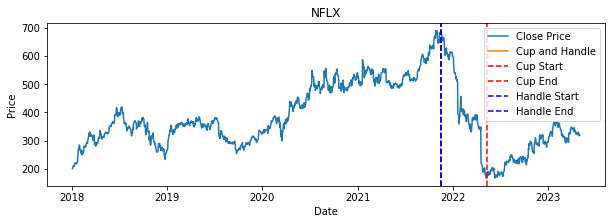

[*********************100%***********************]  1 of 1 completed


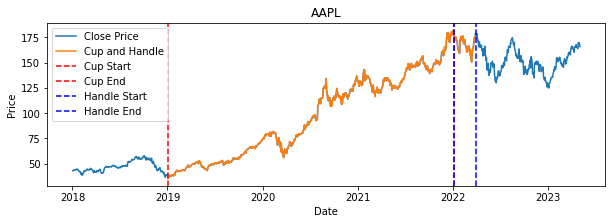

[*********************100%***********************]  1 of 1 completed


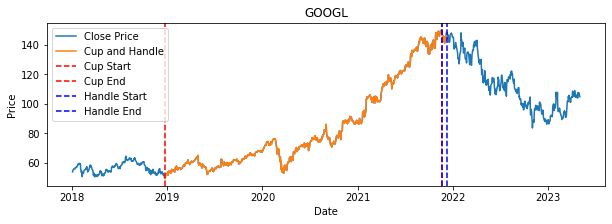

[*********************100%***********************]  1 of 1 completed


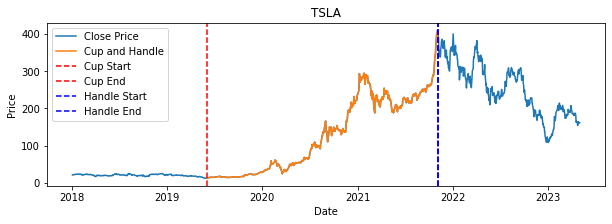

In [15]:
for ticker in stock_list:
    df = yf.download(ticker,'2018-01-01','2023-05-05')
    df = df.reset_index()
    dates = df['Date']
    high_prices = df['High']
    low_prices = df['Low']
    close_prices = df['Close']

    # Calculate the cup and handle boundaries
    cup_start = low_prices.idxmin()
    cup_end = low_prices.idxmax()
    handle_start = cup_end + 1
    handle_end = close_prices[handle_start:].idxmax()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[cup_start:handle_end], close_prices[cup_start:handle_end], label='Cup and Handle')

    # Plot cup and handle boundaries
    plt.axvline(x=dates[cup_start], color='r', linestyle='--', linewidth=1.5, label='Cup Start')
    plt.axvline(x=dates[cup_end], color='r', linestyle='--', linewidth=1.5, label='Cup End')
    plt.axvline(x=dates[handle_start], color='b', linestyle='--', linewidth=1.5, label='Handle Start')
    plt.axvline(x=dates[handle_end], color='b', linestyle='--', linewidth=1.5, label='Handle End')

    plt.title(ticker)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()